In [2]:
import ants
import os
import matplotlib.pyplot as plt
import numpy as np

from glob import glob

['/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/healthy_nii/000652515/161_From_SA_scaled.nii.gz', '/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/healthy_nii/600360681/1088_From_SA_scaled.nii.gz', '/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/healthy_nii/002475009/409_From_SA_scaled.nii.gz', '/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/healthy_nii/000149118/108_From_SA_scaled.nii.gz', '/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/healthy_nii/600860468/1004_From_SA_scaled.nii.gz']


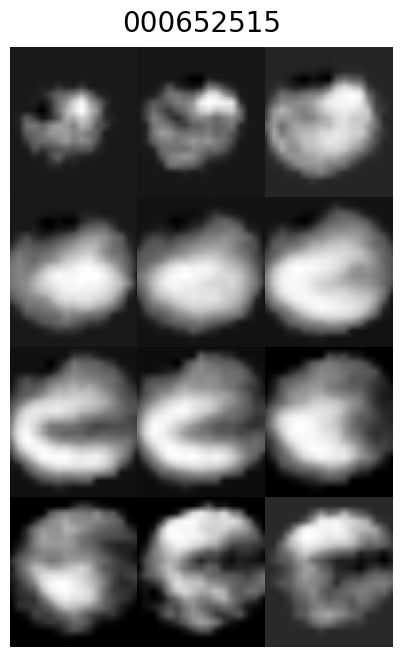

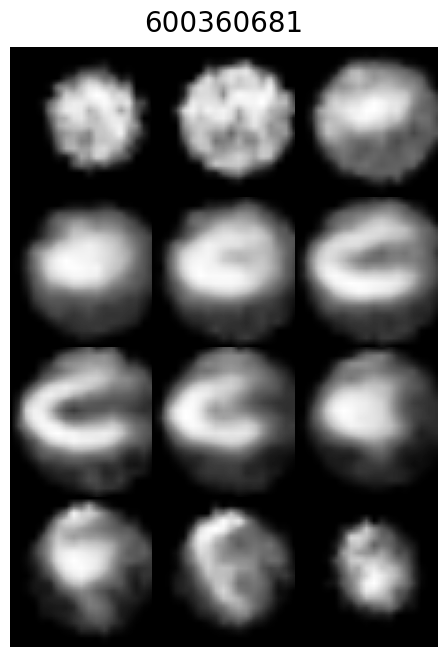

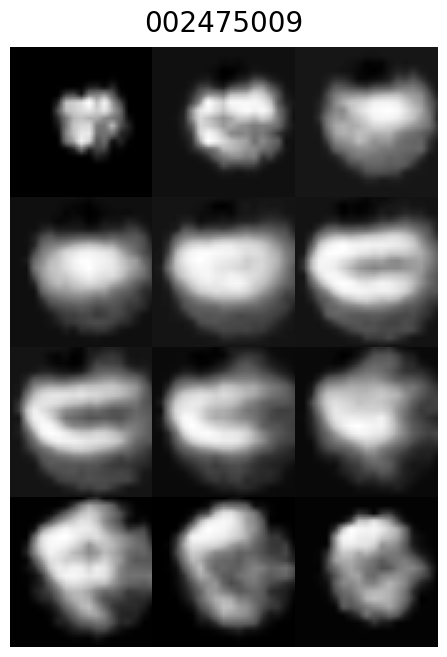

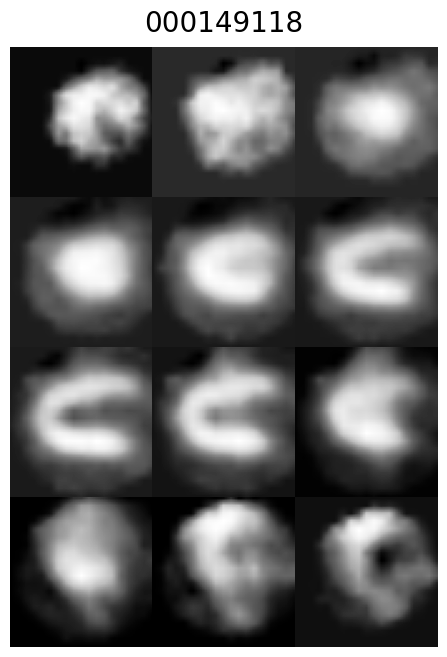

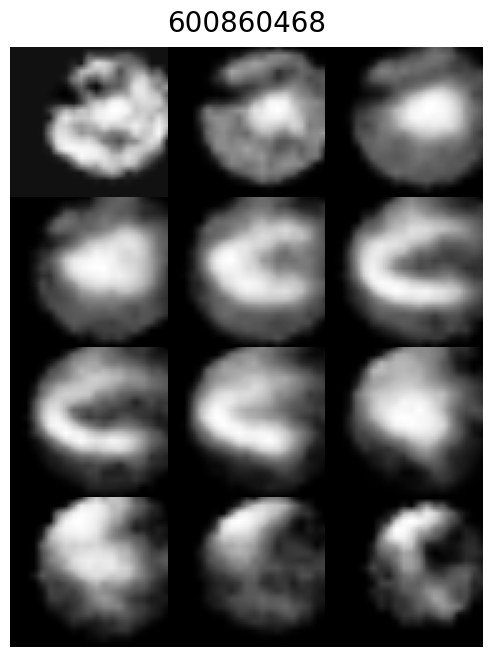

In [5]:
base_dir = "/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/healthy_nii"
input_paths = glob(os.path.join(base_dir, "*", "*_scaled.nii.gz"))
print(input_paths)


imgs = []
for path in input_paths:
    image = ants.image_read(path)
    img_arr = image.numpy()
    image = ants.from_numpy(img_arr[:,:,:,0])
    imgs.append(image)
    ants.plot(image, title=path.split('/')[-2])

In [21]:
fixed = imgs[0]
moving = imgs[1]

In [24]:
print(11111, np.percentile(fixed.numpy(), 90))

11111 396.0


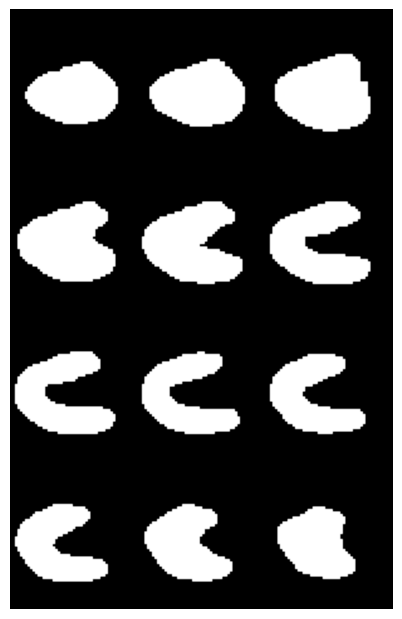

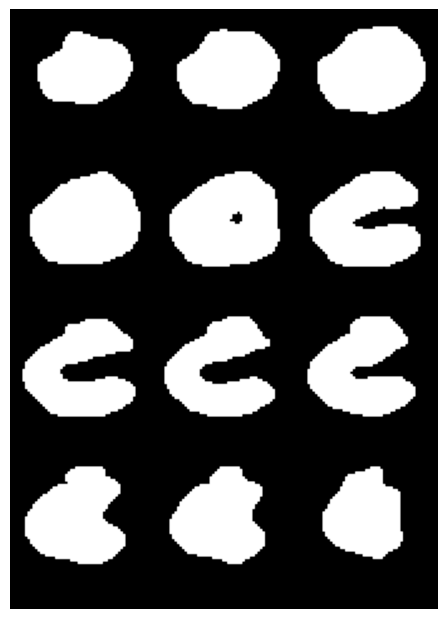

In [27]:
fixed_mask = ants.get_mask(fixed, low_thresh=np.percentile(fixed.numpy(), 90))
ants.plot(fixed_mask)

moving_mask = ants.get_mask(moving, low_thresh=np.percentile(fixed.numpy(), 90))
ants.plot(moving_mask)

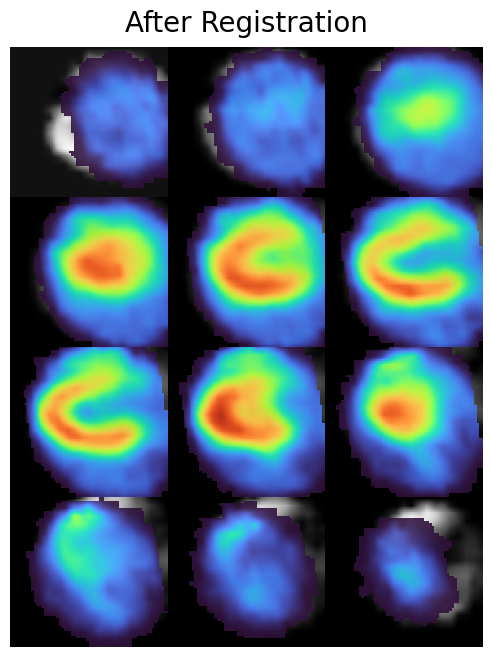

/tmp/tmpyu0k8o6y0GenericAffine.mat
ANTsTransform
	 Type       : AffineTransform
	 Dimension  : 3
	 Precision  : float

Affine Matrix:
 [ 1.07217252 -0.04540398  0.08038606 -0.19837701  1.00062037  0.1503886
 -0.07540195 -0.02993766  0.94691205 -1.08298159 -6.06070375  0.69891739]
[[ 1.07217252 -0.04540398  0.08038606]
 [-0.19837701  1.00062037  0.1503886 ]
 [-0.07540195 -0.02993766  0.94691205]
 [-1.08298159 -6.06070375  0.69891739]]


In [30]:
mytx = ants.registration(fixed=image , 
                         moving=moving, 
                        #  type_of_transform='Similarity', 
                         type_of_transform='Affine', 
                         mask = fixed_mask,
                         moving_mask = moving_mask,
                          # 只允许 X/Y/Z 方向的缩放和平移
                          # (scaleX, scaleY, scaleZ, translateX, translateY, translateZ, rotateX, rotateY, rotateZ)
                         restrict_transformation=(1, 1, 1, 1, 1, 1, 0, 0, 0) )

warped_moving = mytx['warpedmovout']
image.plot(overlay=warped_moving,
           title='After Registration')

transMat_file = mytx['fwdtransforms'][-1]
print(transMat_file)
transMat = ants.read_transform(transMat_file)
print(transMat)
print("Affine Matrix:\n", transMat.parameters)
print(transMat.parameters.reshape(4,3))